# Health insurance cross sell prediction

# Problem statement
   To Predict whether a customer would need vehicle insurance or not.This helps in building communication strategy of the company with the customers to optimise its business model and revenue.

# Business context
  Client is an insurance company that provides health insurance to people and is need to provide a model to predict if its         policy holders need vehicle insurance or not.An insurance policy is an arrangement ehich the company undertakes to provide a     guarantee of compensation for specified loss,damage,illness or death in return for a specified premium amount.A premium is a     sum of money that the client has to regularly pay to an insurance company for this guarantee.
  Just like medical insurance there is vehicle insurance where evry customer need to pay a certain premium to insurance provider company so that in case of unfortunate accident by the vehicle the insurance provider company will pay a compensation (sum assured) to the customer.
   

# Import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize
from scipy import stats
from scipy.stats import randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold



In [2]:
#Installing xgboost
!pip install xgBoost


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# importing xgboost
import xgboost as xg

In [4]:
#installing imbalanced_learn
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#importing RANDOMoVERsAMPLER
from imblearn.over_sampling import RandomOverSampler

# Loading dataset

In [6]:
df=pd.read_csv(r"C:\Users\riyaz\Downloads\TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [7]:
#Retrieving first 5 rows
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
#Retrieving shape of dataset
df.shape

(381109, 12)

# Dataset has 381109 rows and 12 columns.

In [9]:
#datatypes,null and non-null columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
# Describing the dataset
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Checking for missing values or null values

In [11]:
#Total no of nulls in columns
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# No missing or null values in the dataset

# Checking unique values in columns

In [12]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [13]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [14]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [15]:
df['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [16]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [17]:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [18]:
df['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [19]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [20]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

# Exploratory data analysis

Text(0, 0.5, 'Count')

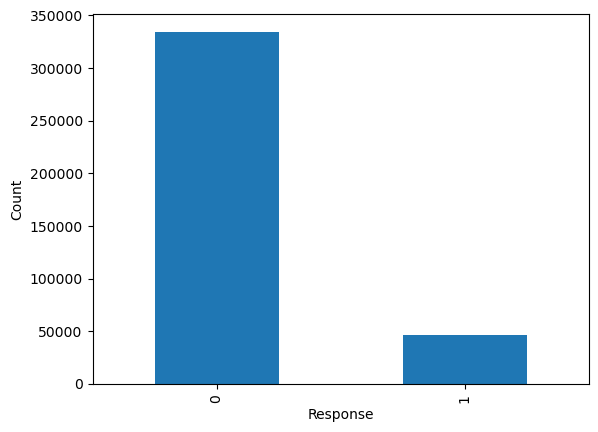

In [21]:
#Count of responses plotted
df['Response'].value_counts().plot(x='Response',y='count',kind='bar')
plt.xlabel("Response")
plt.ylabel("Count")


In [22]:
#Calculating percentage of interested clients
response_percentage=round(df['Response'].value_counts()[1]*100/df.shape[0])

In [23]:
response_percentage

12

# 12% clients are interested in vehicle insurance

<AxesSubplot:xlabel='Gender', ylabel='count'>

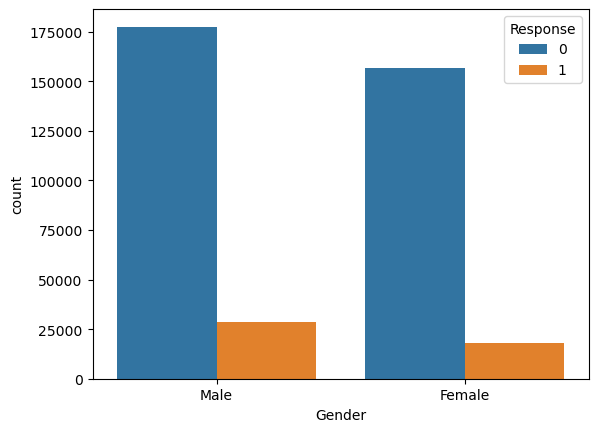

In [24]:

sns.countplot(x=df['Gender'],hue = df['Response'])

In [56]:

df.groupby('Gender')['Response'].sum()

Gender
Female    18185
Male      28525
Name: Response, dtype: int64

In [97]:
# No of males and females interested in vehicle insurance
Positive_response_1 = df[df['Response'] == 1]
Positive_response_male =Positive_response_1[Positive_response_1['Gender'] == 'Male'].shape[0]
Positive_response_female = Positive_response_1[Positive_response_1['Gender'] == 'Female'].shape[0]
print("No of males who are interested in vehicle insurance",Positive_response_male)
print("No of females who are interested in vehicle insurance",Positive_response_female)

No of males who are interested in vehicle insurance 28525
No of females who are interested in vehicle insurance 18185


In [113]:
print('Percentage of males interested in vehicle insurance',(2825/381109)*100)
print('Percentage of females interested in vehicle insurance',(18185/381109)*100)

Percentage of males interested in vehicle insurance 0.7412577504073637
Percentage of females interested in vehicle insurance 4.771600775631119


<AxesSubplot:>

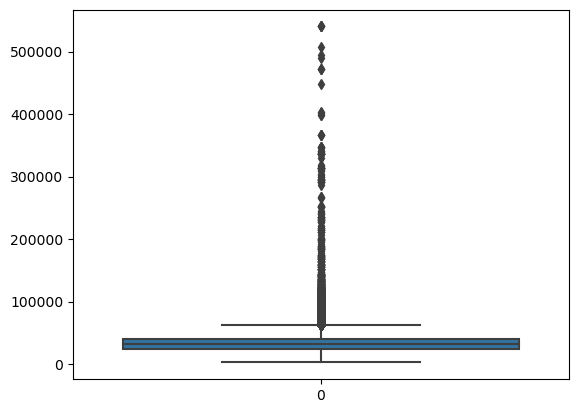

In [25]:
#Plotting ouliers in a feature
sns.boxplot(df['Annual_Premium'])

# Handling outliers

In [26]:
# Calculate the IQR
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

# Define Winsorization limits 
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Winsorize the column
df['Annual_Premium'] = df['Annual_Premium'].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

<AxesSubplot:>

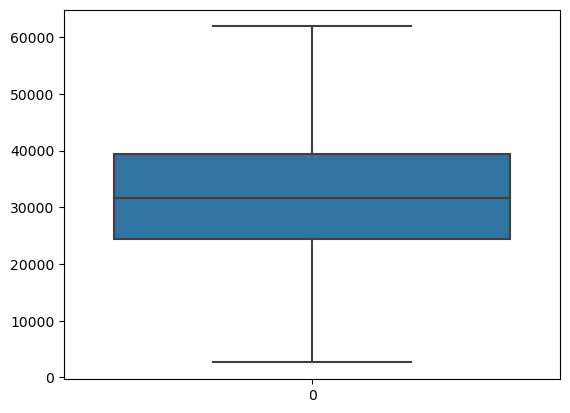

In [27]:
#Feature with ouliers removed
sns.boxplot(df['Annual_Premium'])

# Feature Engineering

## Performing one hot encoding on categorical features

In [28]:
cat_fea=[col for col in df.columns if df[col].dtype == 'object']

df_dummies=pd.get_dummies(df,columns=cat_fea,drop_first=True)



In [29]:
df_dummies.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


# Dropping id column

In [30]:
df1=df_dummies.drop('id',axis=1)
#Dropiing id column before creating models

In [31]:
#Replacing < sign from column 
df1.columns=df1.columns.str.replace('[<]','')
  

C:\Users\riyaz\AppData\Local\Temp\ipykernel_17708\369864525.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1.columns=df1.columns.str.replace('[<]','')


In [32]:
df1['Driving_License'].value_counts() 

1    380297
0       812
Name: Driving_License, dtype: int64

In [33]:
no_license=df1[df1['Driving_License']==0].index
df1.drop(no_license,inplace=True)
#Dropping rows with no driving license as they wont be requiring vehicle insurance.

In [34]:
#Policy_Sales_Channel and count responses
response_counts = df1.groupby('Policy_Sales_Channel')['Response'].sum()

# Find the channel with the highest response count
max_response_channel_id = response_counts.idxmax()

print("Policy Sales Channel with Highest Response Count:", max_response_channel_id)


Policy Sales Channel with Highest Response Count: 26.0


### Policy Sales Channel 26 has maximim positive response

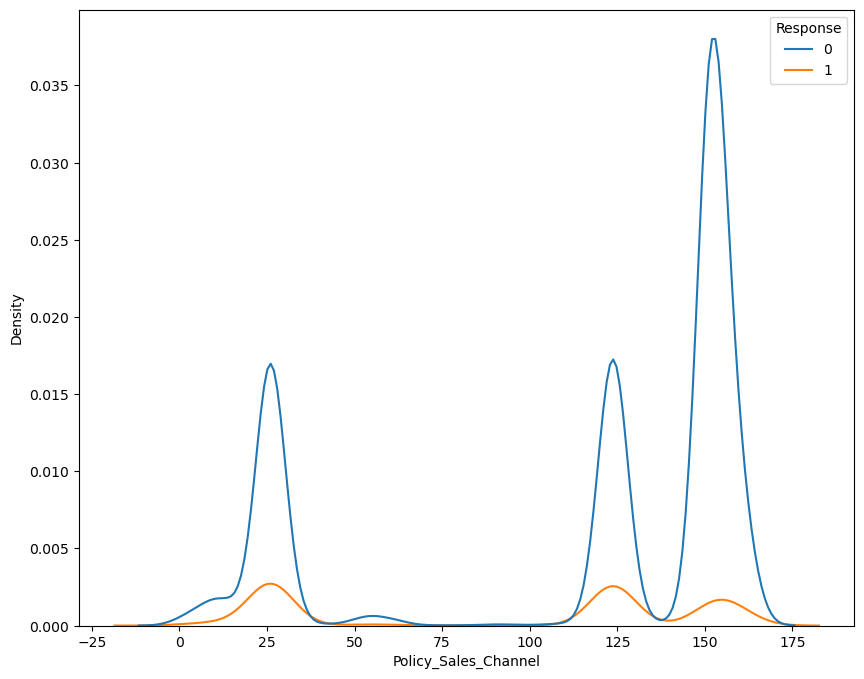

In [35]:
# Plot KDE plot
plt.figure(figsize=(10, 8))
sns.kdeplot(x='Policy_Sales_Channel', data=df1, hue='Response')
plt.show()

In [36]:
# Filter the DataFrame based on condition
filtered_df = df1[(df1['Previously_Insured'] == 1) & (df1['Response'] == 1)]

# Get the total count of previously insured vehicles with response = 1
total_previous_insured_with_response_1 = len(filtered_df)

print("Total number of previously insured vehicles with response 1:", total_previous_insured_with_response_1)

Total number of previously insured vehicles with response 1: 158


### 158 Vehicles are previously insured

In [112]:
#Region code with the highest response rate
yes_1=df1[df1['Response']==1]
yes_1['Region_Code'].value_counts()           
                
     

28.0    19900
8.0      3251
41.0     2222
46.0     2030
29.0     1361
3.0      1179
11.0     1041
15.0      958
30.0      900
35.0      865
33.0      759
36.0      703
18.0      678
47.0      652
50.0      642
45.0      615
39.0      574
48.0      476
6.0       439
37.0      436
7.0       432
14.0      422
38.0      389
13.0      364
24.0      341
12.0      311
21.0      303
23.0      300
2.0       286
4.0       285
10.0      263
9.0       252
19.0      250
43.0      243
32.0      239
20.0      223
27.0      208
31.0      197
26.0      187
17.0      184
0.0       174
40.0      153
5.0       148
49.0      137
16.0      134
34.0      126
1.0       109
25.0      107
22.0       83
42.0       44
44.0       33
52.0       33
51.0       28
Name: Region_Code, dtype: int64

### Regioncode  28.0 has the maximim response rate 

# Finding correlation between features

In [37]:
#Finding relation between features
df1.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_ 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
Age,1.000000,NaN,0.042580,-0.254721,0.066133,-0.577373,-0.001362,0.112568,0.144839,-0.788087,0.221333,0.267547
Driving_License,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,0.042580,NaN,1.000000,-0.024750,-0.009647,-0.042591,-0.002691,0.010642,0.000622,-0.044285,0.014615,0.028295
Previously_Insured,-0.254721,NaN,-0.024750,1.000000,0.007475,0.219422,0.002507,-0.341651,-0.081810,0.358828,-0.191371,-0.824280
Annual_Premium,0.066133,NaN,-0.009647,0.007475,1.000000,-0.117980,-0.000813,0.022256,0.003435,-0.018868,0.063779,0.007226
Policy_Sales_Channel,-0.577373,NaN,-0.042591,0.219422,-0.117980,1.000000,0.000039,-0.139882,-0.110578,0.571253,-0.146561,-0.224338
Vintage,-0.001362,NaN,-0.002691,0.002507,-0.000813,0.000039,1.000000,-0.000996,-0.002446,0.002454,0.000528,-0.002084
Response,0.112568,NaN,0.010642,-0.341651,0.022256,-0.139882,-0.000996,1.000000,0.052760,-0.210568,0.109523,0.354924
Gender_Male,0.144839,NaN,0.000622,-0.081810,0.003435,-0.110578,-0.002446,0.052760,1.000000,-0.165833,0.043168,0.091497
Vehicle_Age_ 1 Year,-0.788087,NaN,-0.044285,0.358828,-0.018868,0.571253,0.002454,-0.210568,-0.165833,1.000000,-0.182962,-0.370808


<AxesSubplot:>

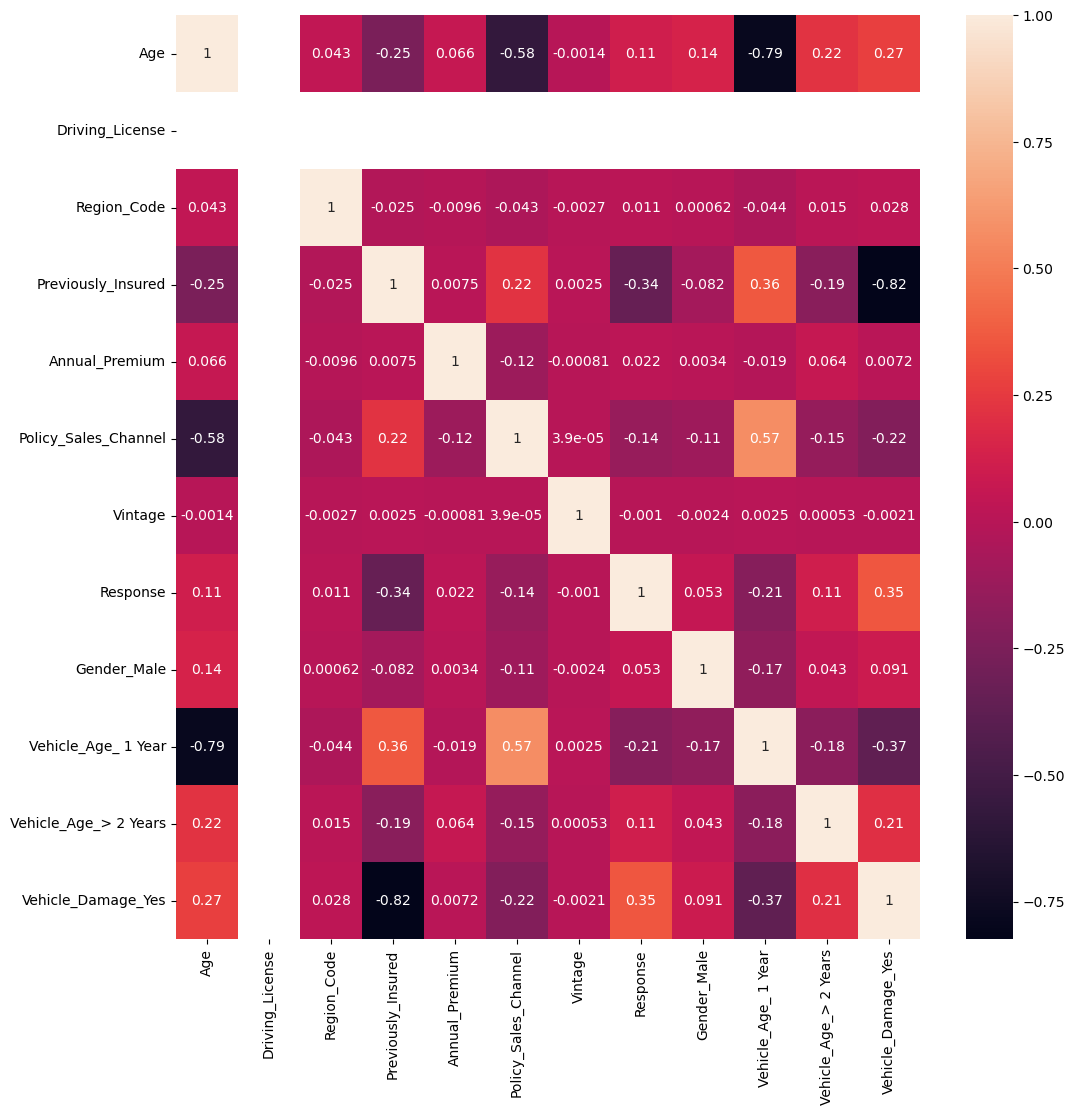

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),annot=True)

### Features are weakly correlated

# Splitting dataset into x and y

In [39]:
x=df1.drop('Response',axis=1)
y=df1.Response

# Handling Imbalanced dataset

In [40]:
df1['Response'].value_counts()

0    333628
1     46669
Name: Response, dtype: int64

In [41]:
from collections import Counter
Counter(y)

Counter({1: 46669, 0: 333628})

In [42]:
# Handling imbalanced datasets using RandomOverSampler
os = RandomOverSampler(sampling_strategy=0.75)  # Corrected
x_new, y_new = os.fit_resample(x, y)

print("No of classes before fit: {}".format(Counter(y)))
print("No of classes after fit: {}".format(Counter(y_new)))

No of classes before fit: Counter({0: 333628, 1: 46669})
No of classes after fit: Counter({0: 333628, 1: 250221})


In [43]:
##= train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_new,y_new, test_size = 0.2,random_state = 20)

In [44]:
#Creting model pipeline
models={
    'Random Forest':RandomForestClassifier(),
    'XGboost':xg.XGBClassifier(),
    

}

In [45]:
def evaluate_model(X_train, y_train, X_test, y_test, models):
    report = {}
    
    for model_name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predict Testing data
        y_test_pred = model.predict(X_test)

        # Get accuracy for test data prediction
        test_model_score = accuracy_score(y_test, y_test_pred)
        cm = confusion_matrix(y_test, y_test_pred)
        prec_score = precision_score(y_test, y_test_pred)
        recal_score = recall_score(y_test, y_test_pred)

        # Store metrics in the report dictionary
        report[model_name] = {
            'confusion_matrix': cm,
            'precision_score': prec_score,
            'recall_score': recal_score,
            'accuracy_score': test_model_score
        }

    return report


In [46]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': {'confusion_matrix': array([[60285,  6444],
         [  402, 49639]], dtype=int64),
  'precision_score': 0.8850988713157285,
  'recall_score': 0.9919665873983333,
  'accuracy_score': 0.9413719277211613},
 'XGboost': {'confusion_matrix': array([[48216, 18513],
         [ 5187, 44854]], dtype=int64),
  'precision_score': 0.7078447772499882,
  'recall_score': 0.896344997102376,
  'accuracy_score': 0.7970369101652822}}

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

In [83]:
# Instantiating RandomForestClassifier and XGBClassifier
classifier=RandomForestClassifier(oob_score=True)
classifier.fit(X_train,y_train)
xgClassifier=xg.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgClassifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

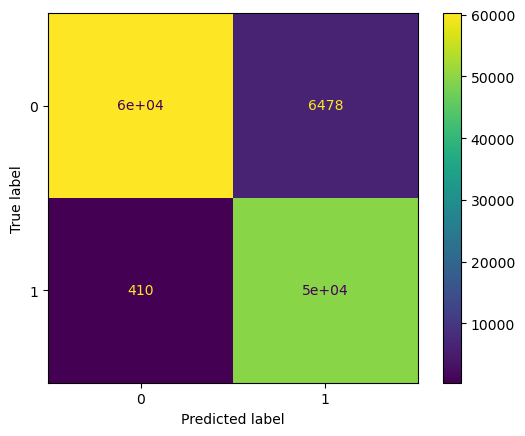

In [76]:
#Plotting confusion matrix for RandomForestClassifier
y_test_pred =classifier.predict(X_test)
cm = confusion_matrix(y_test,y_test_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()

plt.show()

In [101]:
## Hypeparameter Tuning for RandomForestClassifier
params={'max_depth':[3,5,10],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy']
              }
kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=21)   
                        

In [102]:

cross_val = StratifiedKFold(n_splits=3)
clf = RandomForestClassifier()
n_iter_search = 8
random_search = RandomizedSearchCV(clf, param_distributions=params,
                               n_iter=n_iter_search,
                               scoring='roc_auc', cv=cross_val,
                               n_jobs=-1)

In [103]:
# Fitting X_train and y_train
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=8, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc')

In [104]:
#Finding best parameters
random_search.best_params_

{'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}

In [105]:
#Fitting after performing randomized searchcv
rand_clf=RandomForestClassifier(n_estimators= 100, max_depth= 10, criterion= 'gini')
rand_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [106]:
#Predicting y_pred
y_pred=rand_clf.predict(X_test)


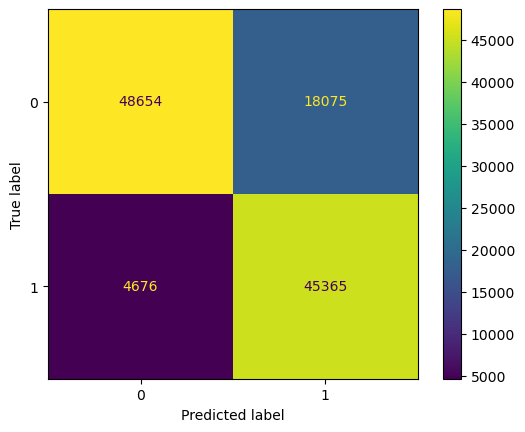

In [107]:
#Plotting confusion_matrix of RandomForestClassfier after using randomized searchcv
cm_randomforest = confusion_matrix(y_test,y_pred, labels=rand_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()

plt.show()

In [108]:
#Classification report of RamdomForestClassifier after hypertuning
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.70      0.79     66729\n           1       0.69      0.89      0.78     50041\n\n    accuracy                           0.78    116770\n   macro avg       0.79      0.80      0.78    116770\nweighted avg       0.81      0.78      0.78    116770\n'

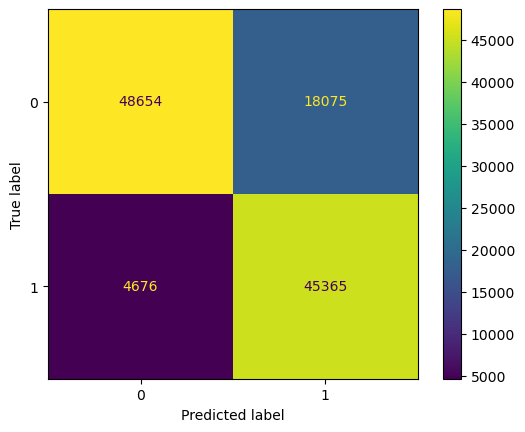

In [86]:
y_predicted=xgClassifier.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
cm_randomforest = confusion_matrix(y_test,y_predicted, labels=rand_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgClassifier.classes_)
disp.plot()

plt.show()


In [67]:
##XgbCalssifer hyperparameter tuning
param_dist = {
    'n_estimators': stats.randint(3,10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.1, 0.3),
    'max_depth': [3, 4, 5,],
    'colsample_bytree': stats.uniform(0.5, 0.6),
    'min_child_weight': [1, 2]
}

clf_xgb = xg.XGBClassifier(objective='binary:logistic')
random_search = RandomizedSearchCV(
    clf_xgb, param_distributions=param_dist, n_iter=3, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3
)

In [68]:
#Performing randomizedsearchcv
search=random_search.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\riyaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\riyaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\riyaz\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\riyaz\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1490, in fit
    self._Booster = train(
  File "C:\Users\riyaz\anaconda3\lib\site-packages\xgboost\core.py", line 620, 

In [69]:
#Finding best parameters
search.best_params_

{'colsample_bytree': 0.7874212256140836,
 'learning_rate': 0.08878261095030364,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 4,
 'subsample': 0.16463748864602962}

In [70]:
params={'colsample_bytree': 0.5213206562835921,
 'learning_rate': 0.02842930492774505,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 7,
 'subsample': 0.3821809157271694}
clf_xgb=xg.XGBClassifier(**params)


In [71]:
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5213206562835921, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02842930492774505,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=7, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [98]:
y_pred_xg=clf_xgb.predict(X_test)

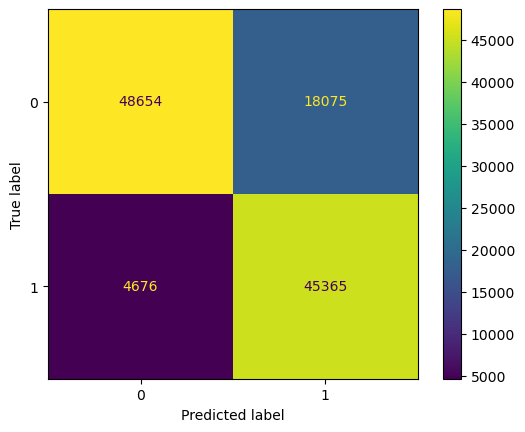

In [99]:
#Plotting confusion matrix for XGboost classifier after Randomizedsearchcn
cm_Xgboost=confusion_matrix(y_test,y_pred_xg)
cm_Xgboost = confusion_matrix(y_test,y_pred_xg, labels=rand_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_xgb.classes_)
disp.plot()

plt.show()


In [89]:
#Classification report of XGBoost classifier after hypertuning
classification_report(y_test,y_test_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.68      0.77     66729\n           1       0.68      0.90      0.77     50041\n\n    accuracy                           0.77    116770\n   macro avg       0.79      0.79      0.77    116770\nweighted avg       0.80      0.77      0.77    116770\n'

# Conclusion

### 1.RandomForestClassifier gives the best accuracy,precision and recall  with the following parameters:
### n_estimators=100
###  criterion=gini
### 2.XGBoost classifier performs well with the following parameters:
### colsample_bytree': 0.7874212256140836,
### 'learning_rate': 0.08878261095030364,
### 'max_depth': 4,
### 'min_child_weight': 1,
### 'n_estimators': 4,
### 'subsample': 0.16463748864602962
### 3.Imbalanced datasets have been handled well with increasing number of minority class.
### 4. Outliers have been removed.


# Suggestion to Stakeholders


### 1. 12% customers with health insurance  are interested in vehicle insurance so focus should be on them.
### 2 Percentage of males who are interested in vehicle insurance are 74 
###  No of females who are interested in vehicle insurance 18185
### So the likelihood of conversion is more with these people with number of men leaading .
### 3 Policy Sales Channel 26 has maximim positive response followed by 126 and 155.So this should be used as an effective communication method.
### 4. 158 Vehicles are previously insured

# 

# 